In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 

In [96]:
maf = 'maf_OrdenadoxPaciente.txt'
data = pd.read_csv(maf, sep='\t')
len(data)

6457

In [97]:
# cambiando MA_Func.Impact por MA_Func_Impact, porque el . no me deja completar!
data.columns = ['Unnamed: 0', 'Hugo_Symbol', 'Chromosome',
       'Variant_Classification', 'Variant_Type', 'i_HGNC_LocusType',
       'is_coding', 'patient', 'MA_Func_Impact']
data.head(4)

,Unnamed: 0,Hugo_Symbol,Chromosome,Variant_Classification,Variant_Type,i_HGNC_LocusType,is_coding,patient,MA_Func_Impact
0,5371,WDR62,19,Frame_Shift_Ins,INS,gene with protein product,1,TCGA-KL-8323-01A-21D-2310-10,NaN
1,5372,WDR62,19,Frame_Shift_Ins,INS,gene with protein product,1,TCGA-KL-8323-01A-21D-2310-10,NaN
2,2866,NOXA1,9,IGR,SNP,gene with protein product,0,TCGA-KL-8323-01A-21D-2310-10,NaN
3,217,OBSCN,1,Intron,SNP,gene with protein product,0,TCGA-KL-8323-01A-21D-2310-10,NaN


In [98]:
# ¿Qué clasificación hay de Mutation Assessor Functional Impact
#data.MA_Func_Impact.drop_duplicates()

### Tipos de mutaciones que vamos a contar: 
Se va a contar para cada tipo de mutación cuantas hay por cada paciente. 

#### Variant classification
- Missense_Mutation
- Silent
- Nonsense_Mutation
- Frame_Shift_Ins
- In_Frame_Del
- IGR
- Frame_Shift_Del
- Splice_Site
- In_Frame_Ins
- Intron
- 3'UTR
- 5'Flank
- RNA
- Nonstop_Mutation
- 5'UTR
- Stop_Codon_Ins
- Stop_Codon_Del

#### Locus Type
- gene with protein product
- NaN
- complex locus constituent
- protocadherin
- readthrough
- pseudogene

#### MutatorAssessor Functional Impact (MAFI)

- NaN
- low
- medium
- neutral
- high

In [99]:
# Identificación de los pacientes en una lista: 
pId = data.patient.drop_duplicates()
pId=pId.tolist()
len(pId) # Hay 66 pacientes

66

In [100]:
# Agrupar los datos por paciente, para poder contar las mutaciones de cada uno
p = data.groupby('patient')
len(p.groups)
#p1 = p.get_group(pId[0])
#p1.MA_Func_Impact.count()


66

In [101]:
# Conteo de mutaciones totales, para cada paciente:
mut_tot = []
for i in range(0,len(pId)):
    #print(len(pId))
    q = p.get_group(pId[i])
    mut_tot.append(len(q))
    #print(q)
#print(mut_tot)

#print('suma total: ', sum(mut_tot))


In [102]:
# Conteo de mutaciones por Variant_classification: 

missense = []
silent = []
nonsense = []
fs_ins = []
if_del =[]
igr = []
fs_del =[]
splice_site =[]
if_ins =[]
intron =[]
utr3 =[]
flank5=[]
rna = []
nonstop =[]
utr5 =[]
stop_ins =[]
stop_del =[]

ms = 0
s = 0
nons = 0
fsi =0
ifd = 0
ig = 0
fsd = 0
ss = 0
ifi = 0
intr = 0
u3 = 0
f5 = 0
arn = 0
nstop = 0
u5 = 0
sci = 0
scd = 0

for i in range(0, len(pId)):
    #print(pId[i])
    q = p.get_group(pId[i])
    #print(len(q))
    for j in range(0, len(q)):
        #print(q.Variant_Classification.iloc[j])
        if q.Variant_Classification.iloc[j] == 'Missense_Mutation':
            ms = ms + 1
        if q.Variant_Classification.iloc[j] == 'Silent':
            s = s + 1
        if q.Variant_Classification.iloc[j] == 'Nonsense_Mutation':
            nons = nons + 1
        if q.Variant_Classification.iloc[j] == 'Frame_Shift_Ins':
            fsi = fsi + 1
        if q.Variant_Classification.iloc[j] == 'In_Frame_Del':
            ifd = ifd + 1
        if q.Variant_Classification.iloc[j] == 'IGR':
            ig = ig + 1
        if q.Variant_Classification.iloc[j] == 'Frame_Shift_Del':
            fsd = fsd + 1
        if q.Variant_Classification.iloc[j] == 'Splice_Site':
            ss = ss + 1
        if q.Variant_Classification.iloc[j] == 'In_Frame_Ins':
            ifi = ifi + 1
        if q.Variant_Classification.iloc[j] == 'Intron':
            intr = intr + 1
        if q.Variant_Classification.iloc[j] == '3\'UTR':
            u3 = u3 + 1
        if q.Variant_Classification.iloc[j] == '5\'Flank':
            f5 = f5 + 1
        if q.Variant_Classification.iloc[j] == 'RNA':
            arn = arn + 1
        if q.Variant_Classification.iloc[j] == 'Nonstop_Mutation':
            nstop = nstop + 1
        if q.Variant_Classification.iloc[j] == '5\'UTR':
            u5 = u5 + 1
        if q.Variant_Classification.iloc[j] == 'Stop_Codon_Ins':
            sci = sci + 1
        if q.Variant_Classification.iloc[j] == 'Stop_Codon_Del':
            scd = scd + 1        
    missense.append(ms)
    silent.append(s)
    nonsense.append(nons)
    fs_ins.append(fsi)
    if_del.append(ifd)
    igr.append(ig)
    fs_del.append(fsd)
    splice_site.append(ss)
    if_ins.append(ifi)
    intron.append(intr)
    utr3.append(u3)
    flank5.append(f5)
    rna.append(arn)
    nonstop.append(nstop)
    utr5.append(u5)
    stop_ins.append(sci)
    stop_del.append(scd)
    ms = 0
    s = 0
    nons = 0
    fsi =0
    ifd = 0
    ig = 0
    fsd = 0
    ss = 0
    ifi = 0
    intr = 0
    u3 = 0
    f5 = 0
    arn = 0
    nstop = 0
    u5 = 0
    sci = 0
    scd = 0
#print('missense', missense, 'silent', silent, 'nonsense', nonsense, 'fsi', fs_ins, 'ifd', if_del, 'igr', igr, 'fsd', fs_del,
 #    'splice site', splice_site, 'if_ins', if_ins, 'intron', intron, 'utr3', utr3, 'flank 5', flank5, 
  #   'rna', rna, 'nonstop', nonstop, 'utr5', utr5, 'stop ins', stop_ins, 'stop_del', stop_del, i)


In [103]:
# Conteo de mutaciones por locus type:

g_prot_prod = []
cadherin = []
read = []
pgene = []
nan_lt = []
cplx = []

pp = 0
nn = 0
clx = 0
cad = 0
r = 0
pg = 0

for i in range(0, len(pId)):
    #print(pId[i])
    q = p.get_group(pId[i])
    #print(len(q))
    for j in range(0, len(q)):
        #print(q.Variant_Classification.iloc[j])
        if q.i_HGNC_LocusType.iloc[j] == 'gene with protein product':
            pp = pp + 1
        if q.i_HGNC_LocusType.iloc[j] == 'complex locus constituent':
            clx = clx + 1
        if q.i_HGNC_LocusType.iloc[j] == 'protocadherin':
            cad = cad + 1
        if q.i_HGNC_LocusType.iloc[j] == 'readthrough':
            r = r + 1
        if q.i_HGNC_LocusType.iloc[j] == 'pseudogene':
            pg = pg + 1
        nn = len(q)- (pp+clx+cad+r+pg)
    g_prot_prod.append(pp)
    cadherin.append(cad)
    read.append(r)
    pgene.append(pg)
    nan_lt.append(nn)
    cplx.append(clx)
    pp = 0
    nn = 0
    clx = 0
    cad = 0
    r = 0
    pg = 0

#0       gene with protein product
#70                            NaN
#571     complex locus constituent
#1644                protocadherin
#3543                  readthrough
#5118                   pseudogene

#print('gpp', g_prot_prod, 'cad', cadherin, 'r', read,'pgene', pgene,'nan', nan_lt,'complex', cplx)

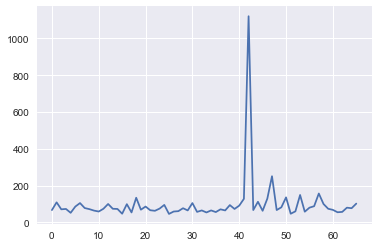

In [104]:
plt.plot(mut_tot)
#plt.plot(g_prot_prod)

In [105]:
# Conteo de mutaciones por impacto funcional determinado por mutator assessor:

#NaN
#low
#medium
#neutral
#high

nn = 0
l=0
m=0
n=0
h=0

mafi_nn =[]
mafi_l =[]
mafi_n=[]
mafi_m=[]
mafi_h=[]


for i in range(0, len(pId)):
    #print(pId[i])
    q = p.get_group(pId[i])
    #print(len(q))
    for j in range(0, len(q)):
        #print(q.Variant_Classification.iloc[j])        
        if q.MA_Func_Impact.iloc[j] == 'low':
            l=l+1
        if q.MA_Func_Impact.iloc[j] == 'medium':
            m=m+1
        if q.MA_Func_Impact.iloc[j] == 'neutral':
            n=n+1
        if q.MA_Func_Impact.iloc[j] == 'high':
            h=h+1
        nn = len(q) - (l+m+n+h)
        
    mafi_nn.append(nn)
    mafi_l.append(l)
    mafi_n.append(n)
    mafi_m.append(m)
    mafi_h.append(h)
    nn = 0
    l=0
    m=0
    n=0
    h=0
    
#print('nn', mafi_nn, 'low', mafi_l, 'neutral', mafi_n, 'medium', mafi_m, 'high', mafi_h)

In [106]:
#sns.plt.plot(mut_tot)
#sns.plt.plot(mafi_l, 'o')

In [107]:
# Para hacer un data frame con el conteo de mutaciones:
d = list(zip(pId, mut_tot, g_prot_prod, cplx, cadherin, read, pgene, nan_lt, mafi_nn, mafi_l, mafi_n, mafi_m, mafi_h,
            missense, silent,  nonsense, fs_ins, if_del, igr,  fs_del, splice_site, if_ins,  intron,
            utr3, flank5,rna,  nonstop,  utr5,  stop_ins, stop_del))


In [110]:
# nombrando las columnas y haciendo el dataframe:
cols = ['id', 'mutTot', 'mut_GeneWProtProd', 'mut_ComplexLocConst',
       'mut_Protocadherin', 'mut_Readthroug', 'mut_PseudoGene', 'mut_NaNLocusType', 
       'mut_mafiNaN', 'mut_mafiLow', 'mut_mafiNeutral', 'mut_mafiMed', 
       'mut_mafiHigh', 'missense', 'silent', 'nonsense', 'frame_shift_ins', 'in_frame_del', 'IGR', 'frame_shift_del',
        'splice_site', 'in_frame_ins', 'intron', '3utr', '5flank', 'rna', 'nonstop', '5utr', 'stop_codon_ins', 'stop_codon_del']

muts_per_pat = pd.DataFrame(d , columns=cols)
muts_per_pat.columns

Index(['id', 'mutTot', 'mut_GeneWProtProd', 'mut_ComplexLocConst',
       'mut_Protocadherin', 'mut_Readthroug', 'mut_PseudoGene',
       'mut_NaNLocusType', 'mut_mafiNaN', 'mut_mafiLow', 'mut_mafiNeutral',
       'mut_mafiMed', 'mut_mafiHigh', 'missense', 'silent', 'nonsense',
       'frame_shift_ins', 'in_frame_del', 'IGR', 'frame_shift_del',
       'splice_site', 'in_frame_ins', 'intron', '3utr', '5flank', 'rna',
       'nonstop', '5utr', 'stop_codon_ins', 'stop_codon_del'],
      dtype='object')

In [126]:
# Quiero mirar solo el total y el functional impact: 
tot_mafi = muts_per_pat.drop (['mut_GeneWProtProd', 'mut_ComplexLocConst',
       'mut_Protocadherin', 'mut_Readthroug', 'mut_PseudoGene', 'mut_NaNLocusType', 
         'missense', 'silent', 'nonsense', 'frame_shift_ins', 'in_frame_del', 'IGR', 'frame_shift_del',
         'splice_site', 'in_frame_ins', 'intron', '3utr', '5flank', 'rna', 'nonstop', '5utr', 
          'stop_codon_ins', 'stop_codon_del'], axis=1)

# organizadas de mayor a menor numero de mutaciones totales:
tot_fi_ord = tot_mafi.sort_values('mutTot', ascending=False)
# Una nueva columna que diga en qué posición se encuentra, siendo 1 el que mas mutaciones tiene.

#orden= list(range(0, 65)) 
tot_fi_ord['orden'] = range(1,len(tot_fi_ord)+1)
#len(tot_fi_ord)
#len(range(1,len(tot_fi_ord)+1))


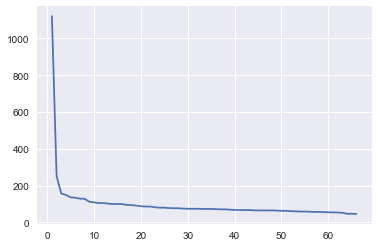

In [130]:
sns.plt.plot(tot_fi_ord.orden, tot_fi_ord.mutTot)

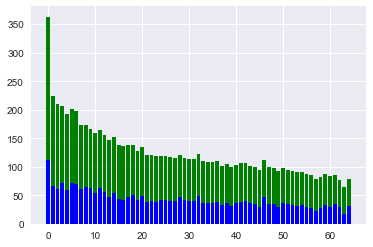

In [182]:
tot = tot_fi_ord.mutTot.iloc[1:]
N = len(tot)
x = np.arange(N)
nan_fi = tot_fi_ord.mut_mafiNaN.iloc[1:]
p1 = sns.plt.bar(x, tot, color='b')
p2 = sns.plt.bar(x, tot, color='g', bottom=tot -nan_fi)

In [183]:
#muts_per_pat[['mutTot', 'mut_mafiNaN']]

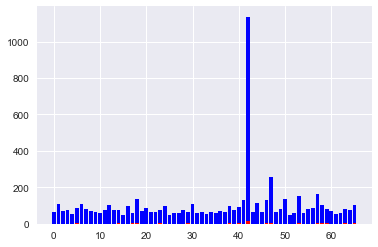

In [171]:
tot = muts_per_pat.mutTot
N = len(tot)
x = np.arange(N)
gwpp = muts_per_pat.mut_GeneWProtProd
#npp = sum(muts_per_pat.mutTot) - sum( muts_per_pat.mut_GeneWProtProd)
p1 = sns.plt.bar(x, tot, color='r')
p3 = sns.plt.bar(x, tot, color='b', bottom=tot-gwpp)

In [172]:
#muts_per_pat[['mutTot', 'mut_GeneWProtProd']]

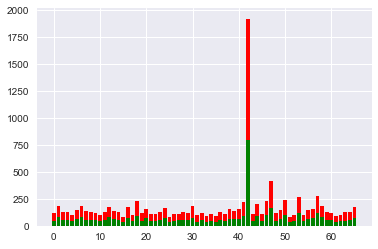

In [174]:
tot = muts_per_pat.mutTot
N = len(tot)
x = np.arange(N)
intron_m = muts_per_pat.intron
sil_m = muts_per_pat.silent
p1 = sns.plt.bar(x, tot, color='g')
p3 = sns.plt.bar(x, tot, color='r', bottom=tot-sil_m)
#print(intron_m)

Cosas encontradas: 
1. Hay muchos Mutator Assessor functional impact en NaN... 
2. Hay muchas mutaciones que tienen gene protein product, es por el tipo de archivo que tomamos? En firehose solo esta la parte de mutaciones codificantes? Y aunque no muchas, hay algunos NaN
3. En Variant_Classification, todos están clasificados... Usamos estos para hacer las medidas?
    - Que puedan tener mucho impacto:
      - Missense
      - nonsense
      - FrameShift indels
      - Splice site
      - 5' flank
      - nonstop
      - stop codon indels
      
      
   - Que pueden tener bajo impacto:
      - Missense
      - Silent
      - InFrame indels
      - IGR (Intergenic Regions)
      - Introns
      - 3 and 5 untranslated regions
      - rna ¿?



__Muchas de las missense tienen la clasificacion MAFI, no todas...__

¿Qué tengo que hacer?
- Sumar todo lo que sea de bajo impacto y compararlo con el total?
